## Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor




import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [2]:
# reading the dataset
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Summary of the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Missing Value Treatment

In [4]:
df.isnull().sum()
#List of Columns containing Null Values
df.columns[df.isna().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [5]:
df.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [6]:
#Columns consisting more than 80% null values
df.loc[:, df.isin([' ','NULL',np.nan]).mean() > .8]

,Alley,PoolQC,Fence,MiscFeature
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
1455,NaN,NaN,NaN,NaN
1456,NaN,NaN,MnPrv,NaN
1457,NaN,NaN,GdPrv,Shed
1458,NaN,NaN,NaN,NaN


In [7]:
#Alley, PoolQC, Fence, and MiscFeature :
#Replacing nan values with "NA" since nan for these columns means No Alley/No Pool/No Misc Feature/No Fence
df.fillna({'Alley':'NA', 'PoolQC': 'NA', 'MiscFeature': 'NA','Fence': 'NA'}, inplace=True)


In [8]:
#Checking nulls again in four columns
print(df.Alley.isnull().sum())
print(df.PoolQC.isnull().sum())
print(df.MiscFeature.isnull().sum())
print(df.Fence.isnull().sum())

0
0
0
0


In [9]:
#Checking Null Value Column List
df.columns[df.isna().any()].tolist()

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [10]:
#Impute null values in LotFrontage
df.LotFrontage.isnull().sum()
df.LotFrontage.unique()

df.LotFrontage.describe()

#Filling null values with median
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
print("Nulls = " + str(df.LotFrontage.isnull().sum()))
df.LotFrontage.unique()

Nulls = 0


array([ 65.        ,  80.        ,  68.        ,  60.        ,
        84.        ,  85.        ,  75.        ,  70.04995837,
        51.        ,  50.        ,  70.        ,  91.        ,
        72.        ,  66.        , 101.        ,  57.        ,
        44.        , 110.        ,  98.        ,  47.        ,
       108.        , 112.        ,  74.        , 115.        ,
        61.        ,  48.        ,  33.        ,  52.        ,
       100.        ,  24.        ,  89.        ,  63.        ,
        76.        ,  81.        ,  95.        ,  69.        ,
        21.        ,  32.        ,  78.        , 121.        ,
       122.        ,  40.        , 105.        ,  73.        ,
        77.        ,  64.        ,  94.        ,  34.        ,
        90.        ,  55.        ,  88.        ,  82.        ,
        71.        , 120.        , 107.        ,  92.        ,
       134.        ,  62.        ,  86.        , 141.        ,
        97.        ,  54.        ,  41.        ,  79.  

In [11]:
# Impute null values in MasVnrType, imputing missing values with mode due to categorical data
print("Null Count before imputation = " + str(df.MasVnrType.isnull().sum()))
print("Unique Values : " + str(df.MasVnrType.unique()))

df.MasVnrType.describe()
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

print("Null Count after imputation = " + str(df.MasVnrType.isnull().sum()))

Null Count before imputation = 8
Unique Values : ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
Null Count after imputation = 0


Null Count before imputation = 8
Summary
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


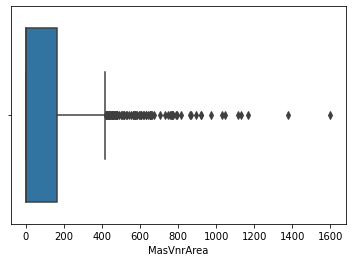

Null Count after imputation = 0


In [12]:
#MasVnrArea
print("Null Count before imputation = " + str(df.MasVnrArea.isnull().sum()))
#print("Unique Values : " + str(df.MasVnrArea.unique()))
print("Summary\n" + str(df.MasVnrArea.describe()))
sns.boxplot(x=df['MasVnrArea'])
plt.show()

#Imputing missing value with median, since this data seems to be containing outliers
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
print("Null Count after imputation = " + str(df.MasVnrArea.isnull().sum()))

In [13]:
#Missing Value Imputation For Basement related features
print("BsmtQual Null Count: " + str(df.BsmtQual.isnull().sum()))
#df.BsmtQual.unique()
print("BsmtCond Null Count: " + str(df.BsmtCond.isnull().sum()))
print("BsmtExposure Null Count: " + str(df.BsmtExposure.isnull().sum()))
print("BsmtFinType1 Null Count: " + str(df.BsmtFinType1.isnull().sum()))
print("BsmtFinType2 Null Count: " + str(df.BsmtFinType2.isnull().sum()))

#Replacing null value with NA, since null value here means no basement
df.fillna({'BsmtQual':'NA', 'BsmtCond': 'NA', 'BsmtExposure': 'NA','BsmtFinType1': 'NA', 'BsmtFinType2': 'NA'}, inplace=True)


BsmtQual Null Count: 37
BsmtCond Null Count: 37
BsmtExposure Null Count: 38
BsmtFinType1 Null Count: 37
BsmtFinType2 Null Count: 38


In [14]:
#Missing Value Imputation For Garage Related Features
print("GarageType Null Count: " + str(df.GarageType.isnull().sum()))
print("GarageYrBlt Null Count: " + str(df.GarageYrBlt.isnull().sum()))
print("GarageFinish Null Count: " + str(df.GarageFinish.isnull().sum()))
print("GarageQual Null Count: " + str(df.GarageQual.isnull().sum()))
print("GarageCond Null Count: " + str(df.GarageCond.isnull().sum()))
print("FireplaceQu Null Count: " + str(df.FireplaceQu.isnull().sum()))


#Replacing null value with NA, since null value here means no Garage
df.fillna({'GarageType':'NA', 'GarageFinish': 'NA','GarageQual': 'NA', 'GarageCond': 'NA', 'FireplaceQu': 'NA'}, inplace=True)
#Replacing Garage year built null values with median
df.GarageYrBlt.fillna(df.GarageYrBlt.median(), inplace=True)


GarageType Null Count: 81
GarageYrBlt Null Count: 81
GarageFinish Null Count: 81
GarageQual Null Count: 81
GarageCond Null Count: 81
FireplaceQu Null Count: 690


In [15]:
#Missing Value Imputation for "Electrical"
print("Electrical Null Count: " + str(df.Electrical.isnull().sum()))

#Imputing missing value with mode because this is categorical data
df.Electrical.fillna(df.Electrical.mode()[0], inplace=True)
df.Electrical.unique()

Electrical Null Count: 1


array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [16]:
#Checking Null Value Columns List Again
df.columns[df.isna().any()].tolist()

[]

### Handling Year Columns

In [17]:
##converting year to number of years
df['YearBuilt'] = 2020 - df['YearBuilt']
df['YearRemodAdd'] = 2020 - df['YearRemodAdd']
df['GarageYrBlt'] = 2020 - df['GarageYrBlt']
df['YrSold'] = 2020 - df['YrSold']

### Checking data types of columns and changing them appropriately

In [18]:
#Checking Data Types of Features and converting data types accordingly
#Changing MSSubClass to str since it contains categorical data
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['OverallQual'] = df['OverallQual'].apply(str)
#df['YearBuilt'] = df['YearBuilt'].apply(str)
#df['YearRemodAdd'] = df['YearRemodAdd'].apply(str)
df['BsmtFullBath'] = df['BsmtFullBath'].apply(str)
df['BsmtHalfBath'] = df['BsmtHalfBath'].apply(str)
df['FullBath'] = df['FullBath'].apply(str)
df['HalfBath'] = df['HalfBath'].apply(str)
df['BedroomAbvGr'] = df['BedroomAbvGr'].apply(str)
df['KitchenAbvGr'] = df['KitchenAbvGr'].apply(str)
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].apply(str)
df['Fireplaces'] = df['Fireplaces'].apply(str)
#df['GarageYrBlt'] = df['GarageYrBlt'].apply(str)
df['GarageCars'] = df['GarageCars'].apply(str)
#Changing OverallCond into a categorical variable
df['OverallCond'] = df['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
#df['YrSold'] = df['YrSold'].astype(str)
#df['MoSold'] = df['MoSold'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

## Looking out for Outliers and treating them


In [19]:
# Subset all numeric (float and int) variables in the dataset
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   YearBuilt      1460 non-null   int64  
 4   YearRemodAdd   1460 non-null   int64  
 5   MasVnrArea     1460 non-null   float64
 6   BsmtFinSF1     1460 non-null   int64  
 7   BsmtFinSF2     1460 non-null   int64  
 8   BsmtUnfSF      1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   int64  
 10  1stFlrSF       1460 non-null   int64  
 11  2ndFlrSF       1460 non-null   int64  
 12  LowQualFinSF   1460 non-null   int64  
 13  GrLivArea      1460 non-null   int64  
 14  GarageYrBlt    1460 non-null   float64
 15  GarageArea     1460 non-null   int64  
 16  WoodDeckSF     1460 non-null   int64  
 17  OpenPorchSF    1460 non-null   int64  
 18  Enclosed

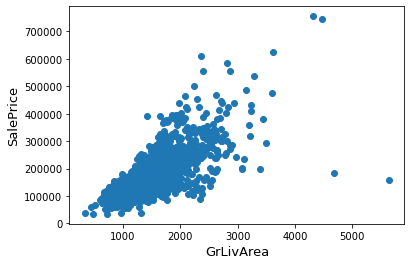

In [20]:
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## Observation: 
We can see at the bottom right two with extremely large GrLivArea that are of a low price. These values are huge oultliers. Therefore, we can safely delete them.

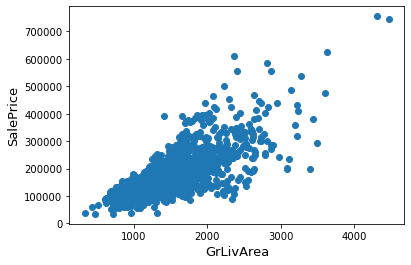

In [21]:
#Deleting outliers
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df['GrLivArea'], df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [22]:
df_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,48.732192,35.134247,103.117123,443.639726,46.549315,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,12.184247,180921.195890
std,421.610009,22.024023,9981.264932,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,34900.000000
25%,365.750000,60.000000,7553.500000,20.000000,16.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,11.000000,129975.000000
50%,730.500000,70.049958,9478.500000,47.000000,26.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,12.000000,163000.000000
75%,1095.250000,79.000000,11601.500000,66.000000,53.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,13.000000,214000.000000
90%,1314.100000,92.000000,14381.700000,95.100000,70.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,14.000000,278000.000000
95%,1387.050000,104.000000,17401.150000,104.000000,70.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,14.000000,326100.000000
99%,1445.410000,137.410000,37567.640000,120.820000,70.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,14.000000,442567.010000


(1452, 81)

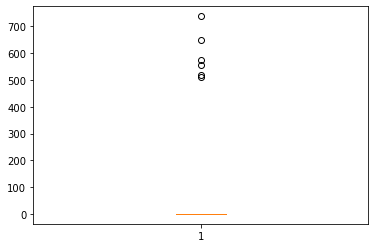

In [23]:
#Outlier Treatment for Pool Area Column

plt.boxplot(df['PoolArea'])
Q1 = df['PoolArea'].quantile(0.1)
Q3 = df['PoolArea'].quantile(0.9)
IQR = Q3 - Q1
df = df[(df['PoolArea'] >= Q1 - 1.5*IQR) & 
                      (df['PoolArea'] <= Q3 + 1.5*IQR)]
df.shape

(1401, 81)

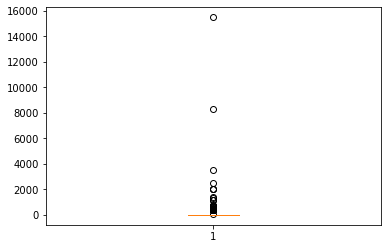

In [24]:
#Outlier Treatment For MiscVal
plt.boxplot(df['MiscVal'])
Q1 = df['MiscVal'].quantile(0.1)
Q3 = df['MiscVal'].quantile(0.9)
IQR = Q3 - Q1
df = df[(df['MiscVal'] >= Q1 - 1.5*IQR) & 
                      (df['MiscVal'] <= Q3 + 1.5*IQR)]
df.shape

(1290, 81)

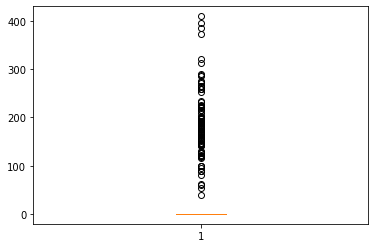

In [25]:
#Outlier Treatment For ScreenPorch

plt.boxplot(df['ScreenPorch'])
Q1 = df['ScreenPorch'].quantile(0.1)
Q3 = df['ScreenPorch'].quantile(0.9)
IQR = Q3 - Q1
df = df[(df['ScreenPorch'] >= Q1 - 1.5*IQR) & 
                      (df['ScreenPorch'] <= Q3 + 1.5*IQR)]
df.shape

(1274, 81)

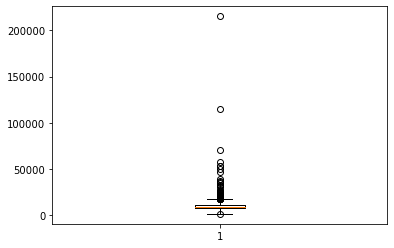

In [26]:
#Outlier Treatment For LotArea
plt.boxplot(df['LotArea'])
Q1 = df['LotArea'].quantile(0.1)
Q3 = df['LotArea'].quantile(0.9)
IQR = Q3 - Q1
df = df[(df['LotArea'] >= Q1 - 1.5*IQR) & 
                      (df['LotArea'] <= Q3 + 1.5*IQR)]
df.shape

(1262, 81)

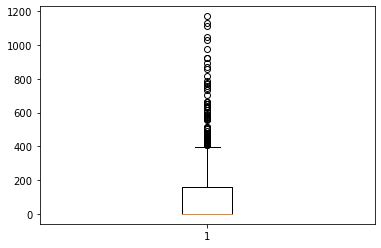

In [27]:
#Outlier Treatment For MasVnrArea
plt.boxplot(df['MasVnrArea'])
Q1 = df['MasVnrArea'].quantile(0.1)
Q3 = df['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
df = df[(df['MasVnrArea'] >= Q1 - 1.5*IQR) & 
                      (df['MasVnrArea'] <= Q3 + 1.5*IQR)]
df.shape

(1260, 81)

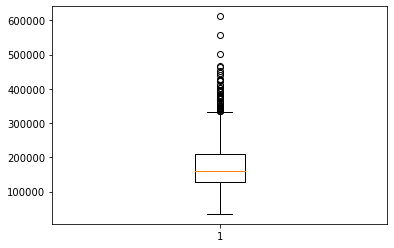

In [28]:
#Outlier Treatment For SalePrice
plt.boxplot(df['SalePrice'])
Q1 = df['SalePrice'].quantile(0.1)
Q3 = df['SalePrice'].quantile(0.9)
IQR = Q3 - Q1
df = df[(df['SalePrice'] >= Q1 - 1.5*IQR) & 
                      (df['SalePrice'] <= Q3 + 1.5*IQR)]
df.shape

In [29]:
#Dropping Id, since we don't need this feature
df_numeric = df_numeric.drop(['Id'], axis=1)
df_numeric.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,17,17,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,12,208500
1,80.0,9600,44,44,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,13,181500
2,68.0,11250,19,18,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,12,223500
3,60.0,9550,105,50,0.0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,14,140000
4,84.0,14260,20,20,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,12,250000


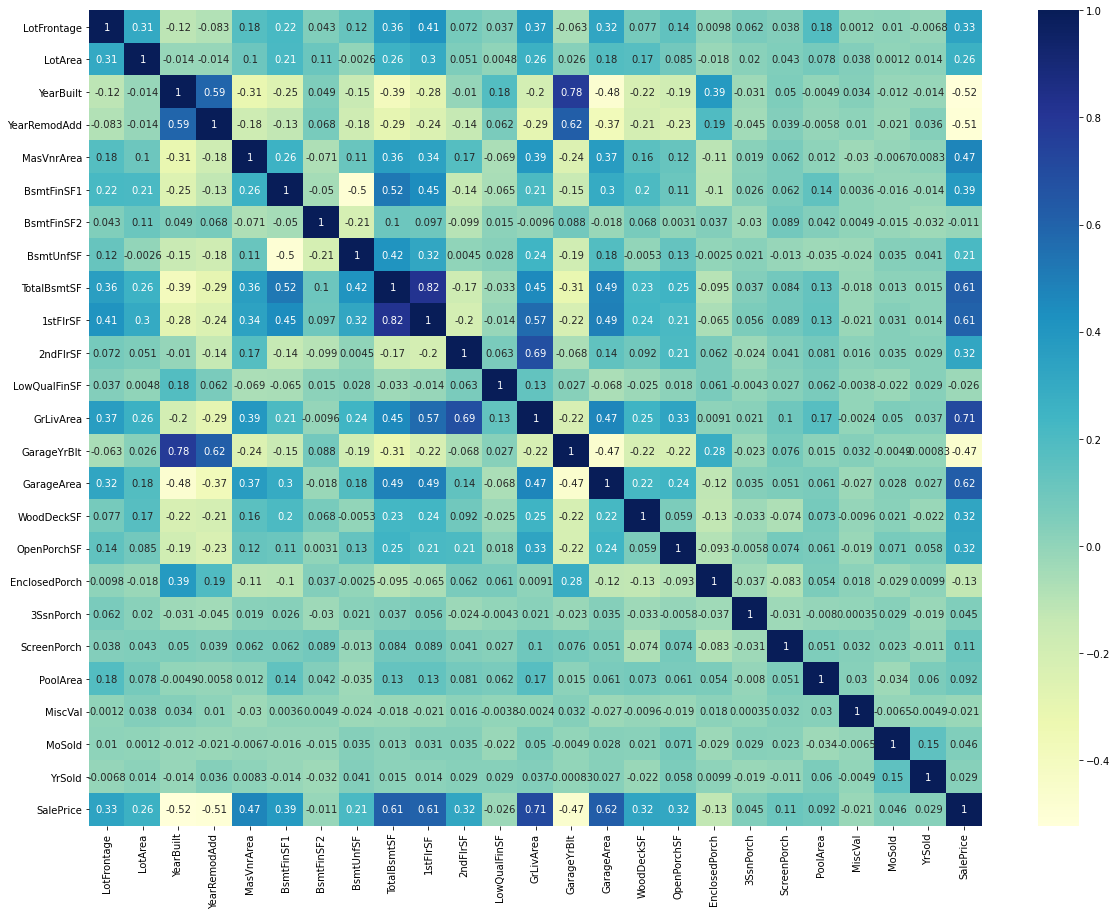

In [30]:
#Correlation map to see how features are correlated with SalePrice
# correlation matrix
cor = df_numeric.corr()
#figure size
plt.figure(figsize=(20,15))
#heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


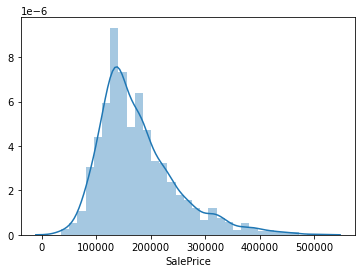

In [31]:
#Checking target variable, SalePrice, distribution
sns.distplot(df['SalePrice'])
plt.show()

## Observation:
Target variable is right skewed. Hence, we need to perform log transformation in order to distribute data normally


### Log Transformation Of Target Variable


 mu = 12.00 and sigma = 0.39



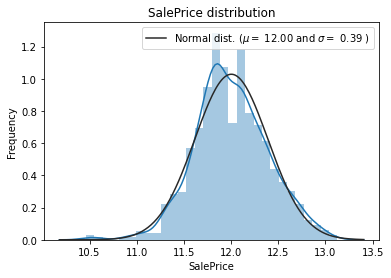

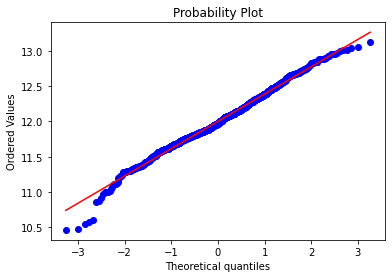

In [32]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["SalePrice"] = np.log1p(df["SalePrice"])

#Check the new distribution 
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

In [33]:
print(df['SalePrice'].skew())
print(df['SalePrice'].kurt())

-0.040950410722259224
0.5094115190721138


### Data Preparation

In [34]:
# Converting categorical variables with 2 unique values using binary encoding
df['Street'] = df['Street'].map({'Pave':0, 'Grvl':1})
df['CentralAir'] = df['CentralAir'].map({'Y':1, 'N':0})

df.Street.unique()

array([0, 1], dtype=int64)

In [35]:
#Dropping columns which has least effect on saleprice. "Utilities" column has just one unique value, hence dropping it.
df = df.drop(['Id','Utilities'], axis=1)


In [36]:
#Split into X and y

X = df.drop(['SalePrice'], axis=1)
y = df.loc[:,'SalePrice']


In [37]:
# creating dummy variables for categorical variables
# subset all categorical variables
df_categorical = X.select_dtypes(include=['object'])
df_categorical.head()
df_categorical.shape

(1260, 52)

In [38]:
#Convert into dummies
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()


,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [39]:
# drop categorical variables 
X = X.drop(list(df_categorical.columns), axis=1)

In [40]:
# concat dummy variables with X
X = pd.concat([X, df_dummies], axis=1)

In [41]:
X.shape


(1260, 304)

In [42]:
# scaling the features
from sklearn.preprocessing import scale
scaler = StandardScaler()
scaler.fit(X)


StandardScaler()

In [43]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 1017 to 1299
Columns: 304 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(23), uint8(278)
memory usage: 182.4 KB


# Model Building and Evaluation

### Ridge and Lasso Regression

#### Let's now try predicting house prices by performing ridge and lasso regression.

#### Ridge Regression

In [44]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    5.6s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [45]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)


{'alpha': 7.0}
-0.08014661283594823


In [46]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.030752,0.006761,0.008776,0.001323,0.0001,{'alpha': 0.0001},-0.099827,-0.118092,-0.107079,-0.101510,...,-0.105527,0.006757,28,-0.051090,-0.049620,-0.053250,-0.051106,-0.052235,-0.051460,0.001221
1,0.020943,0.001546,0.008181,0.000749,0.001,{'alpha': 0.001},-0.099582,-0.117771,-0.106524,-0.101363,...,-0.105250,0.006688,27,-0.051094,-0.049630,-0.053262,-0.051108,-0.052243,-0.051467,0.001222
2,0.019348,0.002410,0.007412,0.000783,0.01,{'alpha': 0.01},-0.097811,-0.115009,-0.101873,-0.100121,...,-0.102977,0.006153,25,-0.051150,-0.049729,-0.053380,-0.051122,-0.052320,-0.051540,0.001233
3,0.017570,0.000503,0.007363,0.000787,0.05,{'alpha': 0.05},-0.093142,-0.107660,-0.091079,-0.097124,...,-0.097332,0.005718,23,-0.051470,-0.050194,-0.053804,-0.051278,-0.052675,-0.051884,0.001241
4,0.021441,0.003193,0.008151,0.001506,0.1,{'alpha': 0.1},-0.090074,-0.103170,-0.085351,-0.095098,...,-0.093840,0.005961,22,-0.051898,-0.050566,-0.054105,-0.051492,-0.053045,-0.052221,0.001233
5,0.019456,0.002365,0.008826,0.002351,0.2,{'alpha': 0.2},-0.086977,-0.099803,-0.082301,-0.093249,...,-0.090993,0.005951,20,-0.052600,-0.051137,-0.054563,-0.051849,-0.053575,-0.052745,0.001217
6,0.020418,0.002256,0.009797,0.000984,0.3,{'alpha': 0.3},-0.085064,-0.097970,-0.080585,-0.092620,...,-0.089460,0.006051,19,-0.053155,-0.051620,-0.054993,-0.052177,-0.053985,-0.053186,0.001215
7,0.020065,0.001730,0.008263,0.000527,0.4,{'alpha': 0.4},-0.083744,-0.096566,-0.079472,-0.092130,...,-0.088372,0.006073,18,-0.053600,-0.052027,-0.055375,-0.052450,-0.054313,-0.053553,0.001220
8,0.020461,0.002841,0.007567,0.001013,0.5,{'alpha': 0.5},-0.082807,-0.095387,-0.078595,-0.091723,...,-0.087507,0.006061,17,-0.053959,-0.052366,-0.055712,-0.052689,-0.054599,-0.053865,0.001232
9,0.019718,0.002052,0.007587,0.001735,0.6,{'alpha': 0.6},-0.082051,-0.094534,-0.077876,-0.091330,...,-0.086800,0.006075,15,-0.054266,-0.052665,-0.056008,-0.052922,-0.054857,-0.054143,0.001239


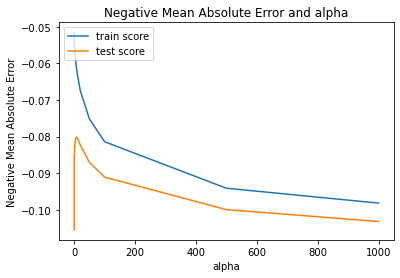

In [47]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [48]:
alpha = 7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 9.98541270e-05,  5.31406926e-06,  1.75441925e-02, -2.62328855e-03,
       -1.27732052e-03,  1.45141364e-05,  7.16826268e-05,  7.38596042e-05,
       -2.35663604e-05,  1.21975866e-04,  3.47789711e-02,  8.63604565e-05,
        1.11568246e-04, -1.13056155e-05,  1.86623079e-04,  1.35184520e-04,
        1.04060561e-04,  9.03519124e-05,  3.52892489e-06,  1.26628480e-04,
        2.57047073e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -8.05343442e-05,  3.93636795e-03, -7.20224818e-02, -1.98279530e-02,
        9.91327587e-03, -1.76965413e-03, -3.32171627e-02,  1.07714748e-02,
        1.24139737e-02,  9.83310980e-03, -1.79437314e-02,  5.98024746e-02,
        1.91868144e-02, -5.55080729e-03,  3.18897443e-03, -1.18419628e-02,
        5.18246899e-02,  3.25803332e-02,  5.49404631e-02,  2.79549483e-02,
       -2.70151630e-02,  2.34707609e-02,  6.44264082e-03,  2.85274607e-03,
        2.10435953e-03,  2.88364513e-02, -2.72446910e-02,  1.13208859e-02,
        3.09090212e-02, -

In [49]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_ridge = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.9473268469389963
0.9035172500995605


In [50]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(11.133, 'constant'),
 (-0.118, 'OverallCond_3'),
 (0.089, 'Neighborhood_Crawfor'),
 (0.088, 'OverallQual_9'),
 (0.084, 'Functional_Typ'),
 (0.083, 'Neighborhood_StoneBr'),
 (-0.08, 'Neighborhood_MeadowV'),
 (0.079, 'Exterior1st_BrkFace'),
 (0.078, 'OverallCond_9'),
 (-0.072, 'MSSubClass_160'),
 (-0.066, 'OverallQual_2'),
 (-0.064, 'OverallQual_4'),
 (0.062, 'OverallQual_8'),
 (0.062, 'SaleCondition_Normal'),
 (0.06, 'MSSubClass_70'),
 (-0.059, 'Neighborhood_IDOTRR'),
 (0.055, 'MSZoning_RL'),
 (-0.055, 'Neighborhood_Mitchel'),
 (0.054, 'OverallCond_7'),
 (0.053, 'OverallCond_8'),
 (0.052, 'MSZoning_FV'),
 (-0.052, 'Condition1_RRAe'),
 (-0.051, 'OverallCond_4'),
 (0.051, 'SaleCondition_Partial'),
 (0.05, 'OverallQual_10'),
 (0.05, 'BsmtFullBath_2'),
 (0.049, 'Condition1_Norm'),
 (0.045, 'Neighborhood_BrkSide'),
 (0.045, 'Neighborhood_Somerst'),
 (-0.045, 'BsmtFinType2_BLQ'),
 (-0.044, 'OverallQual_3'),
 (-0.042, 'BedroomAbvGr_1'),
 (-0.042, 'TotRmsAbvGrd_11'),
 (0.042, 'SaleType_New'),

### Summary:
1.Ridge regression gave us a complex model with most of the coefficients as non-zero values.


2.Ridge regression has not helped us in the feature selection.


### Lasso Regression

In [51]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    8.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.218982,0.063045,0.008389,0.001016,0.0001,{'alpha': 0.0001},-0.080123,-0.092047,-0.074730,-0.088475,...,-0.083637,0.006107,2,-0.055410,-0.053589,-0.056559,-0.053838,-0.055777,-0.055035,0.001144
1,0.057450,0.010815,0.008332,0.001234,0.001,{'alpha': 0.001},-0.083475,-0.085660,-0.078937,-0.080892,...,-0.081890,0.002384,1,-0.070503,-0.069561,-0.071379,-0.069435,-0.070703,-0.070316,0.000730
2,0.029332,0.002973,0.008746,0.000723,0.01,{'alpha': 0.01},-0.110773,-0.107591,-0.100116,-0.104331,...,-0.105940,0.003564,3,-0.100792,-0.100846,-0.102093,-0.103161,-0.102811,-0.101941,0.000978
3,0.056678,0.024748,0.009273,0.001344,0.05,{'alpha': 0.05},-0.113168,-0.111528,-0.102274,-0.107870,...,-0.109038,0.003797,4,-0.104627,-0.104449,-0.106866,-0.106500,-0.106021,-0.105693,0.000982
4,0.052398,0.024510,0.011146,0.003042,0.1,{'alpha': 0.1},-0.112003,-0.112154,-0.102104,-0.107900,...,-0.109166,0.003866,5,-0.105230,-0.104671,-0.107317,-0.106986,-0.106288,-0.106098,0.001010


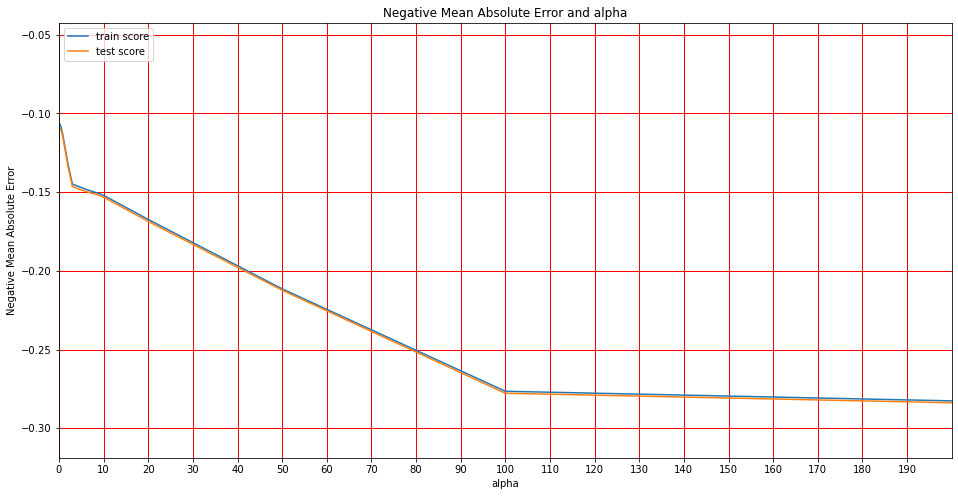

In [53]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [54]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.08189035473374345


In [55]:
alpha =0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9296443519252369
0.8972188369495377


In [56]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(11.237, 'constant'),
 (-0.183, 'OverallCond_3'),
 (0.122, 'OverallQual_9'),
 (0.095, 'Neighborhood_Crawfor'),
 (0.082, 'SaleCondition_Partial'),
 (0.076, 'Functional_Typ'),
 (0.074, 'Exterior1st_BrkFace'),
 (0.067, 'OverallQual_8'),
 (-0.061, 'Neighborhood_MeadowV'),
 (-0.061, 'OverallCond_4'),
 (0.051, 'Neighborhood_BrkSide'),
 (-0.049, 'OverallQual_4'),
 (0.046, 'SaleCondition_Normal'),
 (0.044, 'Neighborhood_StoneBr'),
 (-0.042, 'MSSubClass_30'),
 (0.042, 'MSSubClass_70'),
 (-0.041, 'MSSubClass_160'),
 (-0.039, 'OverallCond_5'),
 (0.039, 'OverallCond_7'),
 (0.039, 'OverallCond_9'),
 (0.038, 'BsmtExposure_Gd'),
 (0.037, 'MSZoning_RL'),
 (-0.036, 'Neighborhood_IDOTRR'),
 (-0.036, 'KitchenAbvGr_2'),
 (-0.036, 'FireplaceQu_NA'),
 (0.035, 'Neighborhood_Somerst'),
 (0.034, 'MSZoning_FV'),
 (0.034, 'Condition1_Norm'),
 (-0.029, 'Neighborhood_Mitchel'),
 (-0.027, 'Foundation_CBlock'),
 (-0.027, 'HeatingQC_TA'),
 (0.026, 'MasVnrType_Stone'),
 (0.024, 'CentralAir'),
 (-0.024, 'BedroomAbvGr_

### Summary:
1.Lasso Regression gave us a simpler model with most of the coefficients as zero values.


2.Lasso Regression has helped us in the feature selection.


### Automated selection of Predictors (RFE)


In [57]:
# Running RFE with the output number of the variable equal to 30
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [58]:
# Listing out the top 30 columns that are selected in RFE (Automated selection of Predictors)
auto_selected_predictors = X_train.columns[rfe.support_]
auto_selected_predictors

Index(['MSSubClass_90', 'BldgType_Duplex', 'OverallQual_10', 'OverallQual_7',
       'OverallQual_8', 'OverallQual_9', 'OverallCond_2', 'OverallCond_3',
       'OverallCond_4', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_8', 'OverallCond_9', 'RoofStyle_Shed',
       'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'BsmtQual_NA',
       'BsmtCond_NA', 'BsmtCond_Po', 'BsmtFinType1_NA', 'BedroomAbvGr_1',
       'BedroomAbvGr_8', 'TotRmsAbvGrd_14', 'Fireplaces_2', 'FireplaceQu_NA',
       'GarageType_NA', 'GarageFinish_NA', 'GarageQual_NA', 'GarageCond_NA'],
      dtype='object')

In [59]:
# Function to take the column names as parameter and create a model along with displaying its statistics
def make_lr_model_mp(cols):
    cols=list(cols)
        
    # Add a constant
    X_train_lm = sm.add_constant(X_train[cols])
    
    # Create a first fitted model
    lr = sm.OLS(y_train, X_train_lm).fit()
    
    # Check the parameters obtained
    print('='*78)
    print(f'Parameters obtained for {cols}')
    print('='*78)
    print(lr.params)
    print('='*78,'\n')
    
    # Print a summary of the linear regression model obtained
    print('='*78)
    print(lr.summary())
    print('='*78,'\n')
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    print('='*78)
    print(f'Computing VIF values to keep track of multicollinearity')
    print('='*78)
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    print('='*78)

In [60]:
# MODEL 1
# Let's consider all the columns selected by RFE for our first model
make_lr_model_mp(list(X[auto_selected_predictors]))

Parameters obtained for ['MSSubClass_90', 'BldgType_Duplex', 'OverallQual_10', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallCond_2', 'OverallCond_3', 'OverallCond_4', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9', 'RoofStyle_Shed', 'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'BsmtQual_NA', 'BsmtCond_NA', 'BsmtCond_Po', 'BsmtFinType1_NA', 'BedroomAbvGr_1', 'BedroomAbvGr_8', 'TotRmsAbvGrd_14', 'Fireplaces_2', 'FireplaceQu_NA', 'GarageType_NA', 'GarageFinish_NA', 'GarageQual_NA', 'GarageCond_NA']
const                 10.664218
MSSubClass_90          0.058906
BldgType_Duplex        0.058906
OverallQual_10         0.892235
OverallQual_7          0.330935
OverallQual_8          0.557185
OverallQual_9          0.799721
OverallCond_2          1.314929
OverallCond_3          0.919527
OverallCond_4          1.090247
OverallCond_5          1.296252
OverallCond_6          1.256307
OverallCond_7          1.299030
OverallCond_8          1.325811
O

In [61]:
# MODEL 2
# Let's consider all the columns selected by Lasso for our second model
make_lr_model_mp(list(X[lasso_selected_features]))

Parameters obtained for ['OverallCond_3', 'OverallQual_9', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'Functional_Typ', 'Exterior1st_BrkFace', 'OverallQual_8', 'Neighborhood_MeadowV', 'OverallCond_4', 'Neighborhood_BrkSide', 'OverallQual_4', 'SaleCondition_Normal', 'Neighborhood_StoneBr', 'MSSubClass_30', 'MSSubClass_70', 'MSSubClass_160', 'OverallCond_5', 'OverallCond_7', 'OverallCond_9', 'BsmtExposure_Gd', 'MSZoning_RL', 'Neighborhood_IDOTRR', 'KitchenAbvGr_2', 'FireplaceQu_NA', 'Neighborhood_Somerst', 'MSZoning_FV', 'Condition1_Norm', 'Neighborhood_Mitchel', 'Foundation_CBlock', 'HeatingQC_TA']
const                    11.838445
OverallCond_3            -0.399413
OverallQual_9             0.461907
Neighborhood_Crawfor      0.107424
SaleCondition_Partial     0.187886
Functional_Typ            0.055179
Exterior1st_BrkFace       0.047779
OverallQual_8             0.259588
Neighborhood_MeadowV     -0.118610
OverallCond_4            -0.099211
Neighborhood_BrkSide     -0.065627
Over

In [62]:
# MODEL 3
# We got better VIF values with the features selected by Lasso, hence refining the model based on KPIs.
#P value of KitchenAbvGr_2 is quite high, let's remove this column
lasso_selected_features.remove('KitchenAbvGr_2')
make_lr_model_mp(list(X[lasso_selected_features]))

 

Parameters obtained for ['OverallCond_3', 'OverallQual_9', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'Functional_Typ', 'Exterior1st_BrkFace', 'OverallQual_8', 'Neighborhood_MeadowV', 'OverallCond_4', 'Neighborhood_BrkSide', 'OverallQual_4', 'SaleCondition_Normal', 'Neighborhood_StoneBr', 'MSSubClass_30', 'MSSubClass_70', 'MSSubClass_160', 'OverallCond_5', 'OverallCond_7', 'OverallCond_9', 'BsmtExposure_Gd', 'MSZoning_RL', 'Neighborhood_IDOTRR', 'FireplaceQu_NA', 'Neighborhood_Somerst', 'MSZoning_FV', 'Condition1_Norm', 'Neighborhood_Mitchel', 'Foundation_CBlock', 'HeatingQC_TA']
const                    11.837327
OverallCond_3            -0.399451
OverallQual_9             0.461851
Neighborhood_Crawfor      0.106835
SaleCondition_Partial     0.188468
Functional_Typ            0.055056
Exterior1st_BrkFace       0.047475
OverallQual_8             0.259650
Neighborhood_MeadowV     -0.117706
OverallCond_4            -0.100333
Neighborhood_BrkSide     -0.065376
OverallQual_4         

In [63]:
# MODEL 4
# Removing features based upon their high p - value
lasso_selected_features.remove('MSSubClass_70')
make_lr_model_mp(list(X[lasso_selected_features]))
            

Parameters obtained for ['OverallCond_3', 'OverallQual_9', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'Functional_Typ', 'Exterior1st_BrkFace', 'OverallQual_8', 'Neighborhood_MeadowV', 'OverallCond_4', 'Neighborhood_BrkSide', 'OverallQual_4', 'SaleCondition_Normal', 'Neighborhood_StoneBr', 'MSSubClass_30', 'MSSubClass_160', 'OverallCond_5', 'OverallCond_7', 'OverallCond_9', 'BsmtExposure_Gd', 'MSZoning_RL', 'Neighborhood_IDOTRR', 'FireplaceQu_NA', 'Neighborhood_Somerst', 'MSZoning_FV', 'Condition1_Norm', 'Neighborhood_Mitchel', 'Foundation_CBlock', 'HeatingQC_TA']
const                    11.832751
OverallCond_3            -0.397596
OverallQual_9             0.461886
Neighborhood_Crawfor      0.101141
SaleCondition_Partial     0.189604
Functional_Typ            0.054937
Exterior1st_BrkFace       0.047848
OverallQual_8             0.259281
Neighborhood_MeadowV     -0.115655
OverallCond_4            -0.100962
Neighborhood_BrkSide     -0.066321
OverallQual_4            -0.207775
Sale

From the above graph and the bestparam score we got optimum lambda to be 0.01

In [64]:
# MODEL 5
# Removing features based upon their high p - value
lasso_selected_features.remove('Neighborhood_Somerst')
make_lr_model_mp(list(X[lasso_selected_features]))
      

Parameters obtained for ['OverallCond_3', 'OverallQual_9', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'Functional_Typ', 'Exterior1st_BrkFace', 'OverallQual_8', 'Neighborhood_MeadowV', 'OverallCond_4', 'Neighborhood_BrkSide', 'OverallQual_4', 'SaleCondition_Normal', 'Neighborhood_StoneBr', 'MSSubClass_30', 'MSSubClass_160', 'OverallCond_5', 'OverallCond_7', 'OverallCond_9', 'BsmtExposure_Gd', 'MSZoning_RL', 'Neighborhood_IDOTRR', 'FireplaceQu_NA', 'MSZoning_FV', 'Condition1_Norm', 'Neighborhood_Mitchel', 'Foundation_CBlock', 'HeatingQC_TA']
const                    11.833764
OverallCond_3            -0.397545
OverallQual_9             0.463869
Neighborhood_Crawfor      0.100732
SaleCondition_Partial     0.192498
Functional_Typ            0.055018
Exterior1st_BrkFace       0.047004
OverallQual_8             0.264228
Neighborhood_MeadowV     -0.115018
OverallCond_4            -0.101012
Neighborhood_BrkSide     -0.066722
OverallQual_4            -0.208072
SaleCondition_Normal      0.

In [65]:
# MODEL 6
# Removing features based upon their high p - value

lasso_selected_features.remove('Exterior1st_BrkFace')
make_lr_model_mp(list(X[lasso_selected_features]))


Parameters obtained for ['OverallCond_3', 'OverallQual_9', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'Functional_Typ', 'OverallQual_8', 'Neighborhood_MeadowV', 'OverallCond_4', 'Neighborhood_BrkSide', 'OverallQual_4', 'SaleCondition_Normal', 'Neighborhood_StoneBr', 'MSSubClass_30', 'MSSubClass_160', 'OverallCond_5', 'OverallCond_7', 'OverallCond_9', 'BsmtExposure_Gd', 'MSZoning_RL', 'Neighborhood_IDOTRR', 'FireplaceQu_NA', 'MSZoning_FV', 'Condition1_Norm', 'Neighborhood_Mitchel', 'Foundation_CBlock', 'HeatingQC_TA']
const                    11.838870
OverallCond_3            -0.400132
OverallQual_9             0.462691
Neighborhood_Crawfor      0.105426
SaleCondition_Partial     0.191213
Functional_Typ            0.053467
OverallQual_8             0.264919
Neighborhood_MeadowV     -0.115989
OverallCond_4            -0.099659
Neighborhood_BrkSide     -0.066858
OverallQual_4            -0.208017
SaleCondition_Normal      0.076891
Neighborhood_StoneBr      0.133131
MSSubClass_30   

In [66]:
# MODEL 7
# Removing features based upon their high p - value

lasso_selected_features.remove('OverallCond_7')
make_lr_model_mp(list(X[lasso_selected_features]))



Parameters obtained for ['OverallCond_3', 'OverallQual_9', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'Functional_Typ', 'OverallQual_8', 'Neighborhood_MeadowV', 'OverallCond_4', 'Neighborhood_BrkSide', 'OverallQual_4', 'SaleCondition_Normal', 'Neighborhood_StoneBr', 'MSSubClass_30', 'MSSubClass_160', 'OverallCond_5', 'OverallCond_9', 'BsmtExposure_Gd', 'MSZoning_RL', 'Neighborhood_IDOTRR', 'FireplaceQu_NA', 'MSZoning_FV', 'Condition1_Norm', 'Neighborhood_Mitchel', 'Foundation_CBlock', 'HeatingQC_TA']
const                    11.849547
OverallCond_3            -0.413203
OverallQual_9             0.462341
Neighborhood_Crawfor      0.107414
SaleCondition_Partial     0.190055
Functional_Typ            0.054479
OverallQual_8             0.265594
Neighborhood_MeadowV     -0.118993
OverallCond_4            -0.112307
Neighborhood_BrkSide     -0.066473
OverallQual_4            -0.206653
SaleCondition_Normal      0.076457
Neighborhood_StoneBr      0.133066
MSSubClass_30            -0.32554

In [67]:
# MODEL 8
# Removing features based upon their high p - value

lasso_selected_features.remove('OverallCond_5')
make_lr_model_mp(list(X[lasso_selected_features]))

Parameters obtained for ['OverallCond_3', 'OverallQual_9', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'Functional_Typ', 'OverallQual_8', 'Neighborhood_MeadowV', 'OverallCond_4', 'Neighborhood_BrkSide', 'OverallQual_4', 'SaleCondition_Normal', 'Neighborhood_StoneBr', 'MSSubClass_30', 'MSSubClass_160', 'OverallCond_9', 'BsmtExposure_Gd', 'MSZoning_RL', 'Neighborhood_IDOTRR', 'FireplaceQu_NA', 'MSZoning_FV', 'Condition1_Norm', 'Neighborhood_Mitchel', 'Foundation_CBlock', 'HeatingQC_TA']
const                    11.859283
OverallCond_3            -0.423365
OverallQual_9             0.465000
Neighborhood_Crawfor      0.102385
SaleCondition_Partial     0.190867
Functional_Typ            0.055103
OverallQual_8             0.267665
Neighborhood_MeadowV     -0.120821
OverallCond_4            -0.120433
Neighborhood_BrkSide     -0.069794
OverallQual_4            -0.204816
SaleCondition_Normal      0.074394
Neighborhood_StoneBr      0.131104
MSSubClass_30            -0.329376
MSSubClass_160 

In [68]:
# MODEL 9
# Removing features based upon their high p-value
lasso_selected_features.remove('OverallCond_9')
make_lr_model_mp(list(X[lasso_selected_features]))

Parameters obtained for ['OverallCond_3', 'OverallQual_9', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'Functional_Typ', 'OverallQual_8', 'Neighborhood_MeadowV', 'OverallCond_4', 'Neighborhood_BrkSide', 'OverallQual_4', 'SaleCondition_Normal', 'Neighborhood_StoneBr', 'MSSubClass_30', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_RL', 'Neighborhood_IDOTRR', 'FireplaceQu_NA', 'MSZoning_FV', 'Condition1_Norm', 'Neighborhood_Mitchel', 'Foundation_CBlock', 'HeatingQC_TA']
const                    11.864040
OverallCond_3            -0.423107
OverallQual_9             0.464690
Neighborhood_Crawfor      0.107264
SaleCondition_Partial     0.190122
Functional_Typ            0.057091
OverallQual_8             0.268703
Neighborhood_MeadowV     -0.124048
OverallCond_4            -0.122373
Neighborhood_BrkSide     -0.069806
OverallQual_4            -0.205813
SaleCondition_Normal      0.075169
Neighborhood_StoneBr      0.130672
MSSubClass_30            -0.329733
MSSubClass_160           -0.0665

In [69]:
# MODEL 10
# Removing features based upon their high p-value
lasso_selected_features.remove('Neighborhood_Mitchel')
make_lr_model_mp(list(X[lasso_selected_features]))

Parameters obtained for ['OverallCond_3', 'OverallQual_9', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'Functional_Typ', 'OverallQual_8', 'Neighborhood_MeadowV', 'OverallCond_4', 'Neighborhood_BrkSide', 'OverallQual_4', 'SaleCondition_Normal', 'Neighborhood_StoneBr', 'MSSubClass_30', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_RL', 'Neighborhood_IDOTRR', 'FireplaceQu_NA', 'MSZoning_FV', 'Condition1_Norm', 'Foundation_CBlock', 'HeatingQC_TA']
const                    11.864892
OverallCond_3            -0.420576
OverallQual_9             0.466637
Neighborhood_Crawfor      0.109533
SaleCondition_Partial     0.192653
Functional_Typ            0.055894
OverallQual_8             0.269897
Neighborhood_MeadowV     -0.123515
OverallCond_4            -0.124826
Neighborhood_BrkSide     -0.068106
OverallQual_4            -0.202845
SaleCondition_Normal      0.076067
Neighborhood_StoneBr      0.131359
MSSubClass_30            -0.328265
MSSubClass_160           -0.064045
BsmtExposure_Gd      

In [70]:
# MODEL 11
# Removing Features based upon their high p-value
lasso_selected_features.remove('Neighborhood_MeadowV')
make_lr_model_mp(list(X[lasso_selected_features]))

Parameters obtained for ['OverallCond_3', 'OverallQual_9', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'Functional_Typ', 'OverallQual_8', 'OverallCond_4', 'Neighborhood_BrkSide', 'OverallQual_4', 'SaleCondition_Normal', 'Neighborhood_StoneBr', 'MSSubClass_30', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_RL', 'Neighborhood_IDOTRR', 'FireplaceQu_NA', 'MSZoning_FV', 'Condition1_Norm', 'Foundation_CBlock', 'HeatingQC_TA']
const                    11.864474
OverallCond_3            -0.418787
OverallQual_9             0.465984
Neighborhood_Crawfor      0.109951
SaleCondition_Partial     0.189528
Functional_Typ            0.052473
OverallQual_8             0.269161
OverallCond_4            -0.126439
Neighborhood_BrkSide     -0.064255
OverallQual_4            -0.216417
SaleCondition_Normal      0.073330
Neighborhood_StoneBr      0.133173
MSSubClass_30            -0.323556
MSSubClass_160           -0.075521
BsmtExposure_Gd           0.125753
MSZoning_RL               0.171396
Neighborho

In [71]:
# MODEL 12
#Removing features based upon their high p-value
lasso_selected_features.remove('Condition1_Norm')
make_lr_model_mp(list(X[lasso_selected_features]))

Parameters obtained for ['OverallCond_3', 'OverallQual_9', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'Functional_Typ', 'OverallQual_8', 'OverallCond_4', 'Neighborhood_BrkSide', 'OverallQual_4', 'SaleCondition_Normal', 'Neighborhood_StoneBr', 'MSSubClass_30', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_RL', 'Neighborhood_IDOTRR', 'FireplaceQu_NA', 'MSZoning_FV', 'Foundation_CBlock', 'HeatingQC_TA']
const                    11.890023
OverallCond_3            -0.416025
OverallQual_9             0.469215
Neighborhood_Crawfor      0.112972
SaleCondition_Partial     0.191011
Functional_Typ            0.052050
OverallQual_8             0.269910
OverallCond_4            -0.127365
Neighborhood_BrkSide     -0.069781
OverallQual_4            -0.214918
SaleCondition_Normal      0.074013
Neighborhood_StoneBr      0.135038
MSSubClass_30            -0.323419
MSSubClass_160           -0.069657
BsmtExposure_Gd           0.127637
MSZoning_RL               0.173613
Neighborhood_IDOTRR      -0.1

In [72]:
# MODEL 13
# Removing features based upon their high p-value
lasso_selected_features.remove('Functional_Typ')
make_lr_model_mp(list(X[lasso_selected_features]))

Parameters obtained for ['OverallCond_3', 'OverallQual_9', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'OverallQual_8', 'OverallCond_4', 'Neighborhood_BrkSide', 'OverallQual_4', 'SaleCondition_Normal', 'Neighborhood_StoneBr', 'MSSubClass_30', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_RL', 'Neighborhood_IDOTRR', 'FireplaceQu_NA', 'MSZoning_FV', 'Foundation_CBlock', 'HeatingQC_TA']
const                    11.938256
OverallCond_3            -0.430527
OverallQual_9             0.471823
Neighborhood_Crawfor      0.114322
SaleCondition_Partial     0.191930
OverallQual_8             0.272304
OverallCond_4            -0.134135
Neighborhood_BrkSide     -0.069744
OverallQual_4            -0.213776
SaleCondition_Normal      0.073298
Neighborhood_StoneBr      0.132387
MSSubClass_30            -0.325323
MSSubClass_160           -0.073870
BsmtExposure_Gd           0.128248
MSZoning_RL               0.175044
Neighborhood_IDOTRR      -0.099877
FireplaceQu_NA           -0.182190
MSZoning_FV 

In [73]:
# MODEL 14
# Removing features based upon their high p-value
lasso_selected_features.remove('Neighborhood_BrkSide')
make_lr_model_mp(list(X[lasso_selected_features]))

Parameters obtained for ['OverallCond_3', 'OverallQual_9', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'OverallQual_8', 'OverallCond_4', 'OverallQual_4', 'SaleCondition_Normal', 'Neighborhood_StoneBr', 'MSSubClass_30', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_RL', 'Neighborhood_IDOTRR', 'FireplaceQu_NA', 'MSZoning_FV', 'Foundation_CBlock', 'HeatingQC_TA']
const                    11.931477
OverallCond_3            -0.431105
OverallQual_9             0.474070
Neighborhood_Crawfor      0.117775
SaleCondition_Partial     0.191526
OverallQual_8             0.274640
OverallCond_4            -0.133188
OverallQual_4            -0.215530
SaleCondition_Normal      0.070938
Neighborhood_StoneBr      0.131786
MSSubClass_30            -0.334239
MSSubClass_160           -0.068316
BsmtExposure_Gd           0.128426
MSZoning_RL               0.181260
Neighborhood_IDOTRR      -0.089157
FireplaceQu_NA           -0.181918
MSZoning_FV               0.272315
Foundation_CBlock        -0.124500
H

In [74]:
# MODEL 15
# Removing features based upon their high p-value
lasso_selected_features.remove('Neighborhood_IDOTRR')
make_lr_model_mp(list(X[lasso_selected_features]))
     

Parameters obtained for ['OverallCond_3', 'OverallQual_9', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'OverallQual_8', 'OverallCond_4', 'OverallQual_4', 'SaleCondition_Normal', 'Neighborhood_StoneBr', 'MSSubClass_30', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_RL', 'FireplaceQu_NA', 'MSZoning_FV', 'Foundation_CBlock', 'HeatingQC_TA']
const                    11.919497
OverallCond_3            -0.433003
OverallQual_9             0.473092
Neighborhood_Crawfor      0.119343
SaleCondition_Partial     0.192531
OverallQual_8             0.274056
OverallCond_4            -0.134111
OverallQual_4            -0.217955
SaleCondition_Normal      0.072081
Neighborhood_StoneBr      0.129927
MSSubClass_30            -0.338699
MSSubClass_160           -0.060433
BsmtExposure_Gd           0.128599
MSZoning_RL               0.193692
FireplaceQu_NA           -0.182212
MSZoning_FV               0.281665
Foundation_CBlock        -0.126198
HeatingQC_TA             -0.075856
dtype: float64

        

In [75]:
# MODEL 16
# Removing features based upon their high p-value
lasso_selected_features.remove('MSSubClass_160')
make_lr_model_mp(list(X[lasso_selected_features]))


Parameters obtained for ['OverallCond_3', 'OverallQual_9', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'OverallQual_8', 'OverallCond_4', 'OverallQual_4', 'SaleCondition_Normal', 'Neighborhood_StoneBr', 'MSSubClass_30', 'BsmtExposure_Gd', 'MSZoning_RL', 'FireplaceQu_NA', 'MSZoning_FV', 'Foundation_CBlock', 'HeatingQC_TA']
const                    11.912759
OverallCond_3            -0.433862
OverallQual_9             0.475612
Neighborhood_Crawfor      0.120520
SaleCondition_Partial     0.192897
OverallQual_8             0.276478
OverallCond_4            -0.130776
OverallQual_4            -0.218431
SaleCondition_Normal      0.070275
Neighborhood_StoneBr      0.118659
MSSubClass_30            -0.333468
BsmtExposure_Gd           0.130273
MSZoning_RL               0.201722
FireplaceQu_NA           -0.182426
MSZoning_FV               0.273538
Foundation_CBlock        -0.127230
HeatingQC_TA             -0.077727
dtype: float64

                            OLS Regression Results           

In [76]:
# MODEL 17
# Removing features based upon their high p-value
lasso_selected_features.remove('Neighborhood_StoneBr')
make_lr_model_mp(list(X[lasso_selected_features]))


Parameters obtained for ['OverallCond_3', 'OverallQual_9', 'Neighborhood_Crawfor', 'SaleCondition_Partial', 'OverallQual_8', 'OverallCond_4', 'OverallQual_4', 'SaleCondition_Normal', 'MSSubClass_30', 'BsmtExposure_Gd', 'MSZoning_RL', 'FireplaceQu_NA', 'MSZoning_FV', 'Foundation_CBlock', 'HeatingQC_TA']
const                    11.911965
OverallCond_3            -0.434045
OverallQual_9             0.494282
Neighborhood_Crawfor      0.119001
SaleCondition_Partial     0.196174
OverallQual_8             0.283440
OverallCond_4            -0.131123
OverallQual_4            -0.218836
SaleCondition_Normal      0.071263
MSSubClass_30            -0.333516
BsmtExposure_Gd           0.129685
MSZoning_RL               0.202423
FireplaceQu_NA           -0.182562
MSZoning_FV               0.269887
Foundation_CBlock        -0.127058
HeatingQC_TA             -0.077769
dtype: float64

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R

#### The present model seems fine in terms of p-value(<0.05) and VIF(<5).  Adjusted R-square looks good as well : .702

In [77]:
# final model parameters
lasso_selected_features

['OverallCond_3',
 'OverallQual_9',
 'Neighborhood_Crawfor',
 'SaleCondition_Partial',
 'OverallQual_8',
 'OverallCond_4',
 'OverallQual_4',
 'SaleCondition_Normal',
 'MSSubClass_30',
 'BsmtExposure_Gd',
 'MSZoning_RL',
 'FireplaceQu_NA',
 'MSZoning_FV',
 'Foundation_CBlock',
 'HeatingQC_TA']

### Visualization and Conclusion of final model


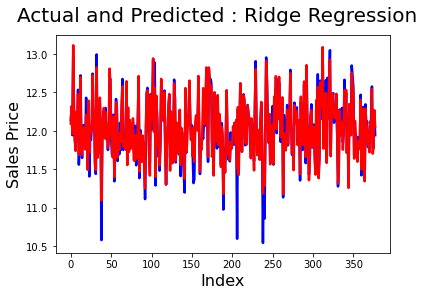

In [78]:
# Ridge Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_ridge, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted : Ridge Regression', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label
plt.show()

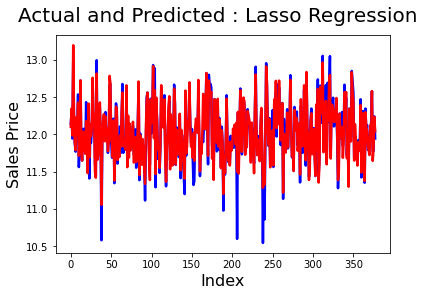

In [79]:
# Lasso Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_lasso, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted : Lasso Regression', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16) 
plt.show()

### Conclusion:

1. Since the model accuracy on test and train set for both models above are similar, we will chose the simpler model.
2. Ridge Regression model is fairly complex, hence we would not consider that.
3. Optimum value of lambda for Ridge Regression is 7.
4. Lasso Regression model is simpler, hence we will consider that, since most co-efficients are zero and hence it allows us to do feature selection.
5. Optimum value of lambda for Lasso Regression is 0.001

#### Most important predictors are as below:


1. SaleCondition_Partial
2. SaleCondition_Normal 
3. OverallQual_8  
4. MSZoning_FV  
5. OverallQual_4  
6. MSZoning_RL 
7. MSSubClass_30 
8. BsmtExposure_Gd
9. OverallQual_9
10. OverallCond_4
11. Neighborhood_Crawfor
12. OverallCond_3
13. FireplaceQu_NA
14. Foundation_CBlock
15. HeatingQC_TA

### Top features to decide sales price from initial data set are listed below:

1. SaleCondition
2. OverallQual
3. MSZoning
4. Neighborhood
5. Foundation
6. HeatingQC
7. MSSubClass
8. FireplaceQu
9. BsmtExposure

### Top 5 Features:
1. OverallQual_9
2. OverallQual_8
3. MSZoning_FV
4. MSZoning_RL 
5. SaleCondition_Partial
